# Capstone Two: Preprocessing and Training


In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [2]:
path1 = '/home/kc3pve/Desktop/Spring-Git/Springboard'
dir2 = path1 + '/' + 'Credit/data/'

In [3]:
dir2

'/home/kc3pve/Desktop/Spring-Git/Springboard/Credit/data/'

In [4]:
app_rec2 = dir2  +'app_rec2.csv'
cre_rec2_g = dir2  +'cre_rec2_g.csv'

In [5]:
app_rec3 = pd.read_csv(app_rec2)
cre_rec3 = pd.read_csv(cre_rec2_g)

In [6]:
# Now we join two data sets but before which we check the common 'elements'
len(set(app_rec3['ID']).intersection(set(cre_rec3['ID'])))

9516

In [7]:
n_data = app_rec3.join(cre_rec3.set_index('ID'), on='ID', how='inner')
#n_data.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
n_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,-9,0
1,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0,0
2,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0,0
3,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0,0
4,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0,0


In [8]:
# Check the shape !
n_data.shape

(9516, 15)

In [9]:
# The data set has reduced
n_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 113342
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  CNT_FAM_MEMBERS      9516 non-null   float64
 13  MONTHS_BALANCE       9516 non-null   int64  
 14  STATUS               9516 non-null   int64  
dtypes: float64(2), int64(13)
memory usag

In [10]:
# Let's check the status
n_data['STATUS'].value_counts(normalize=True)*100


0    87.967633
1    12.032367
Name: STATUS, dtype: float64

In [11]:
# The creditworthy category has larger population than the non-creditworthy. So, it suffers oversampling which
# could be corrected either by decreasing the first category or by increasing the second category. Decreasing the 
#first category isn't good as it will lead to further loss of data. So, we choose to increase the second type 
#of datausing SMOTE (Synthetic Minority Over-sampling Technique). This technique helps to "generate" new data 
#and avoid overfitting the model.
X1 = n_data.iloc[:,1:-1] # X1 value contains all the variables except labels
Y1 = n_data.iloc[:,-1] # these are the labels
Y1

0         0
1         0
2         0
3         0
4         0
         ..
113338    1
113339    1
113340    1
113341    1
113342    1
Name: STATUS, Length: 9516, dtype: int64

<AxesSubplot:ylabel='Frequency'>

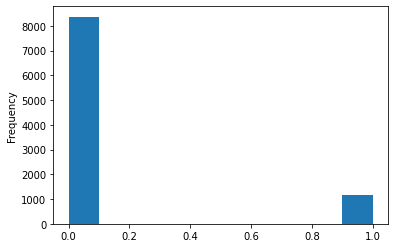

In [12]:
Y1.plot(kind='hist')

In [13]:
# We divide the data into those that will be used to train the model 
# and those that will be used to predict approval : 70 % for training and 30 % for testing.

from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3)

In [14]:
X1_train.shape

(6661, 13)

In [15]:
X1_test.shape

(2855, 13)

In [26]:
# Now, we apply the SMOTE algorithm to make up for the lack of data
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X1_new, Y1_new = oversample.fit_resample(X1_train, Y1_train)
X1_test_new, Y1_test_new = oversample.fit_resample(X1_test, Y1_test)

In [27]:
Y1_new.shape

(11710,)

In [28]:
Y1.shape

(9516,)

<AxesSubplot:ylabel='Frequency'>

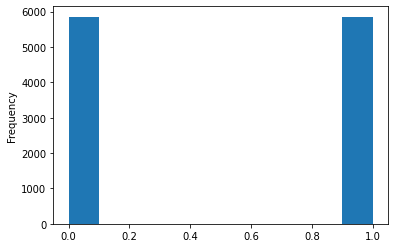

In [19]:
Y1_new.plot(kind='hist')

In [22]:
a = Y1_train.value_counts()
b = Y1_new.value_counts()
print(a, "\n\n", b)

0    5855
1     806
Name: STATUS, dtype: int64 

 1    5855
0    5855
Name: STATUS, dtype: int64


In [24]:
a = Y1_test.value_counts()
b = Y1_test_new.value_counts()
print(a, "\n\n", b)

0    2516
1     339
Name: STATUS, dtype: int64 

 0    2516
1    2516
Name: STATUS, dtype: int64


<AxesSubplot:ylabel='Frequency'>

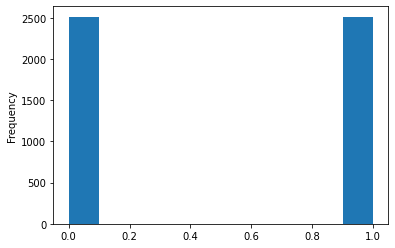

In [31]:
# So, this shows the SMOTE algorithm has helped to address the lack of data
Y1_test_new.plot(kind='hist')